In [1]:
# !pip install gdown
#!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gdown
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# url = "https://drive.google.com/file/d/1kkgBGldeswHBgVKEJiqqG7VZvqZNMc-5/view?usp=drive_link"
# gdown.download(url, "data_2.csv",quiet=False)

In [3]:
data = pd.read_csv("data_2.csv")

In [4]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [6]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [7]:
data.shape

(175777, 14)

In [8]:
data.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [9]:
data.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,546.077240
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,218.717798
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,384.000000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,544.000000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,703.000000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2088.000000


In [10]:
# separate date and time, create hour and period buckets
def hour_to_period(h):
    if pd.isna(h):
        return np.nan
    if 0 <= h <= 5:
        return 'Night'
    if 6 <= h <= 11:
        return 'Morning'
    if 12 <= h <= 17:
        return 'Afternoon'
    return 'Evening'

for col in ['created_at', 'actual_delivery_time']:
    # ensure datetime dtype before using .dt
    data[col] = pd.to_datetime(data[col], errors='coerce')
    data[f'{col}_date'] = data[col].dt.date
    data[f'{col}_time'] = data[col].dt.time
    data[f'{col}_hour'] = data[col].dt.hour
    data[f'{col}_period'] = data[f'{col}_hour'].apply(hour_to_period)
    data[f'{col}_year'] = data[col].dt.year
    data[f'{col}_month'] = data[col].dt.month


In [11]:

data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,created_at_hour,created_at_period,created_at_year,created_at_month,actual_delivery_time_date,actual_delivery_time_time,actual_delivery_time_hour,actual_delivery_time_period,actual_delivery_time_year,actual_delivery_time_month
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,...,22,Evening,2015,2,2015-02-06,23:11:17,23,Evening,2015,2
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,...,21,Evening,2015,2,2015-02-10,22:33:25,22,Evening,2015,2
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,...,0,Night,2015,2,2015-02-16,01:06:35,1,Night,2015,2
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,...,3,Night,2015,2,2015-02-12,04:35:46,4,Night,2015,2
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,...,2,Night,2015,1,2015-01-27,02:58:36,2,Night,2015,1


In [12]:
C = data.columns
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100,
    'Unique Value': data.nunique(),
    'data types': data.dtypes,
})
missing_value.sort_values(by='Unique Value', ascending=False)

,Missing Value,Percentage,Unique Value,data types
created_at,0,0.0,162649,datetime64[ns]
actual_delivery_time,0,0.0,160344,datetime64[ns]
actual_delivery_time_time,0,0.0,44943,object
created_at_time,0,0.0,44899,object
subtotal,0,0.0,8182,int64
max_item_price,0,0.0,2585,int64
min_item_price,0,0.0,2251,int64
estimated_store_to_consumer_driving_duration,0,0.0,1318,float64
total_outstanding_orders,0,0.0,281,float64
total_onshift_dashers,0,0.0,172,float64


In [13]:
# # derive target: difference between actual_delivery_time and created_at in seconds
# data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
# data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'], errors='coerce')
# data['estimated_delivery_time'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds().astype(float)

# # mark non-positive or invalid durations as missing
# data.loc[data['estimated_delivery_time'] <= 0, 'estimated_delivery_time'] = np.nan

In [14]:
data = data.drop(columns=['created_at','actual_delivery_time','actual_delivery_time_month', 'created_at_month', 'created_at_year', 'actual_delivery_time_year','created_at_date','actual_delivery_time_date','actual_delivery_time_time','created_at_time'])


In [15]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,created_at_hour,created_at_period,actual_delivery_time_hour,actual_delivery_time_period
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,Evening,23,Evening
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,Evening,22,Evening
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,Night,1,Night
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,Night,4,Night
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,Night,2,Night


In [16]:
C = data.columns
col_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Unique Value': data.nunique(),
    'data types': data.dtypes,
})
col_value.sort_values(by = 'Unique Value',ascending=False)

,Missing Value,Unique Value,data types
subtotal,0,8182,int64
max_item_price,0,2585,int64
min_item_price,0,2251,int64
estimated_store_to_consumer_driving_duration,0,1318,float64
total_outstanding_orders,0,281,float64
total_onshift_dashers,0,172,float64
total_busy_dashers,0,158,float64
store_primary_category,0,73,int64
total_items,0,54,int64
num_distinct_items,0,20,int64


In [17]:
cat_cols  = data[col_value[(col_value['Unique Value'] <=1500) | (col_value['data types'] == 'object')].index]
cat_cols.head()

,market_id,store_primary_category,order_protocol,total_items,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,created_at_hour,created_at_period,actual_delivery_time_hour,actual_delivery_time_period
0,1.0,4,1.0,4,4,33.0,14.0,21.0,861.0,22,Evening,23,Evening
1,2.0,46,2.0,1,1,1.0,2.0,2.0,690.0,21,Evening,22,Evening
2,2.0,36,3.0,4,3,8.0,6.0,18.0,289.0,0,Night,1,Night
3,1.0,38,1.0,1,1,5.0,6.0,8.0,795.0,3,Night,4,Night
4,1.0,38,1.0,2,2,5.0,5.0,7.0,205.0,2,Night,2,Night


In [18]:
num_cols =  data[col_value[(col_value['Unique Value'] >=100) & (col_value['data types'] != 'object')].index]
num_cols.head()

,subtotal,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,3441,557,1239,33.0,14.0,21.0,861.0
1,1900,1400,1400,1.0,2.0,2.0,690.0
2,4771,820,1604,8.0,6.0,18.0,289.0
3,1525,1525,1525,5.0,6.0,8.0,795.0
4,3620,1425,2195,5.0,5.0,7.0,205.0


In [19]:
num_cols.columns

Index(['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [20]:
cat_cols.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'created_at_hour',
       'created_at_period', 'actual_delivery_time_hour',
       'actual_delivery_time_period'],
      dtype='object')

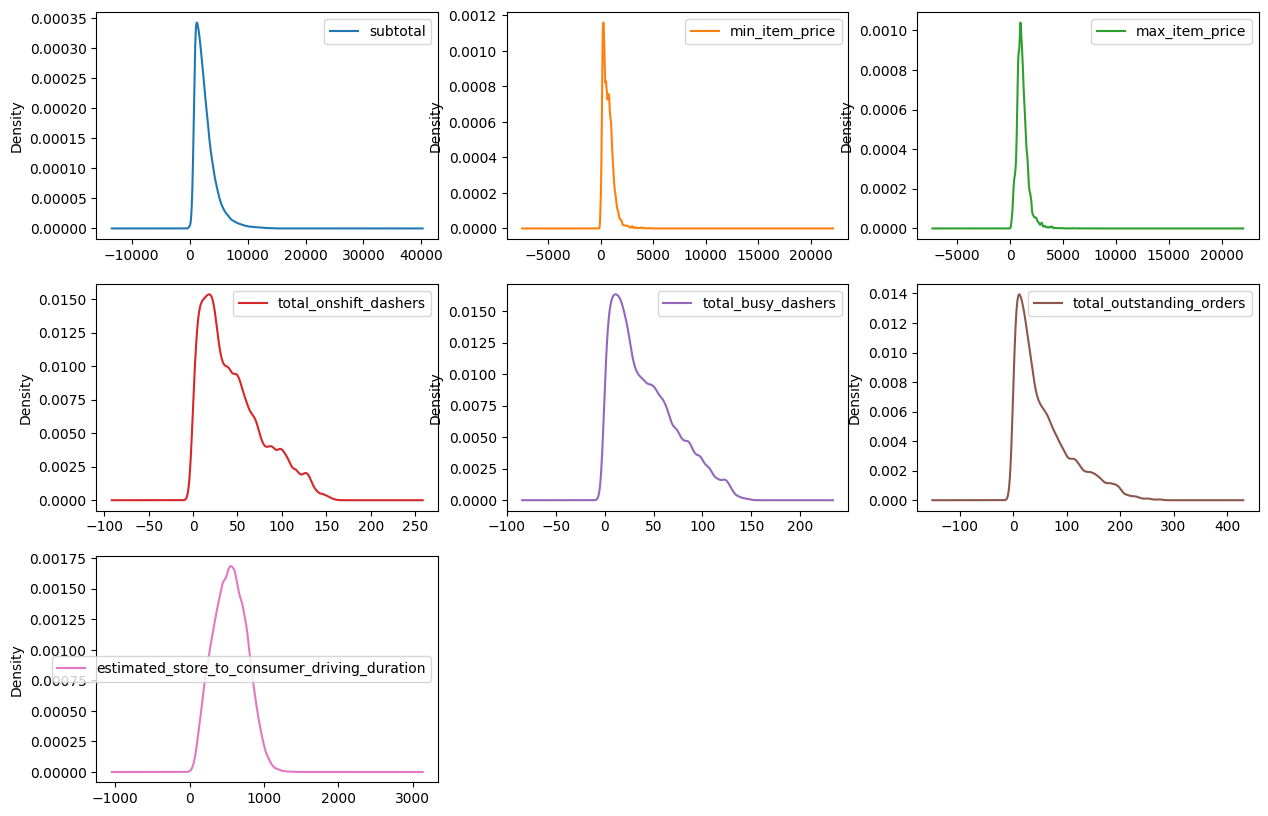

In [21]:
plt.rcParams["figure.figsize"] = [15,10]
# select only numeric columns (exclude datetime) to avoid dtype promotion errors
numeric_cols = num_cols.select_dtypes(include=[np.number])
if numeric_cols.shape[1] == 0:
	print("No numeric columns to plot.")
else:
	numeric_cols.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
	plt.show()

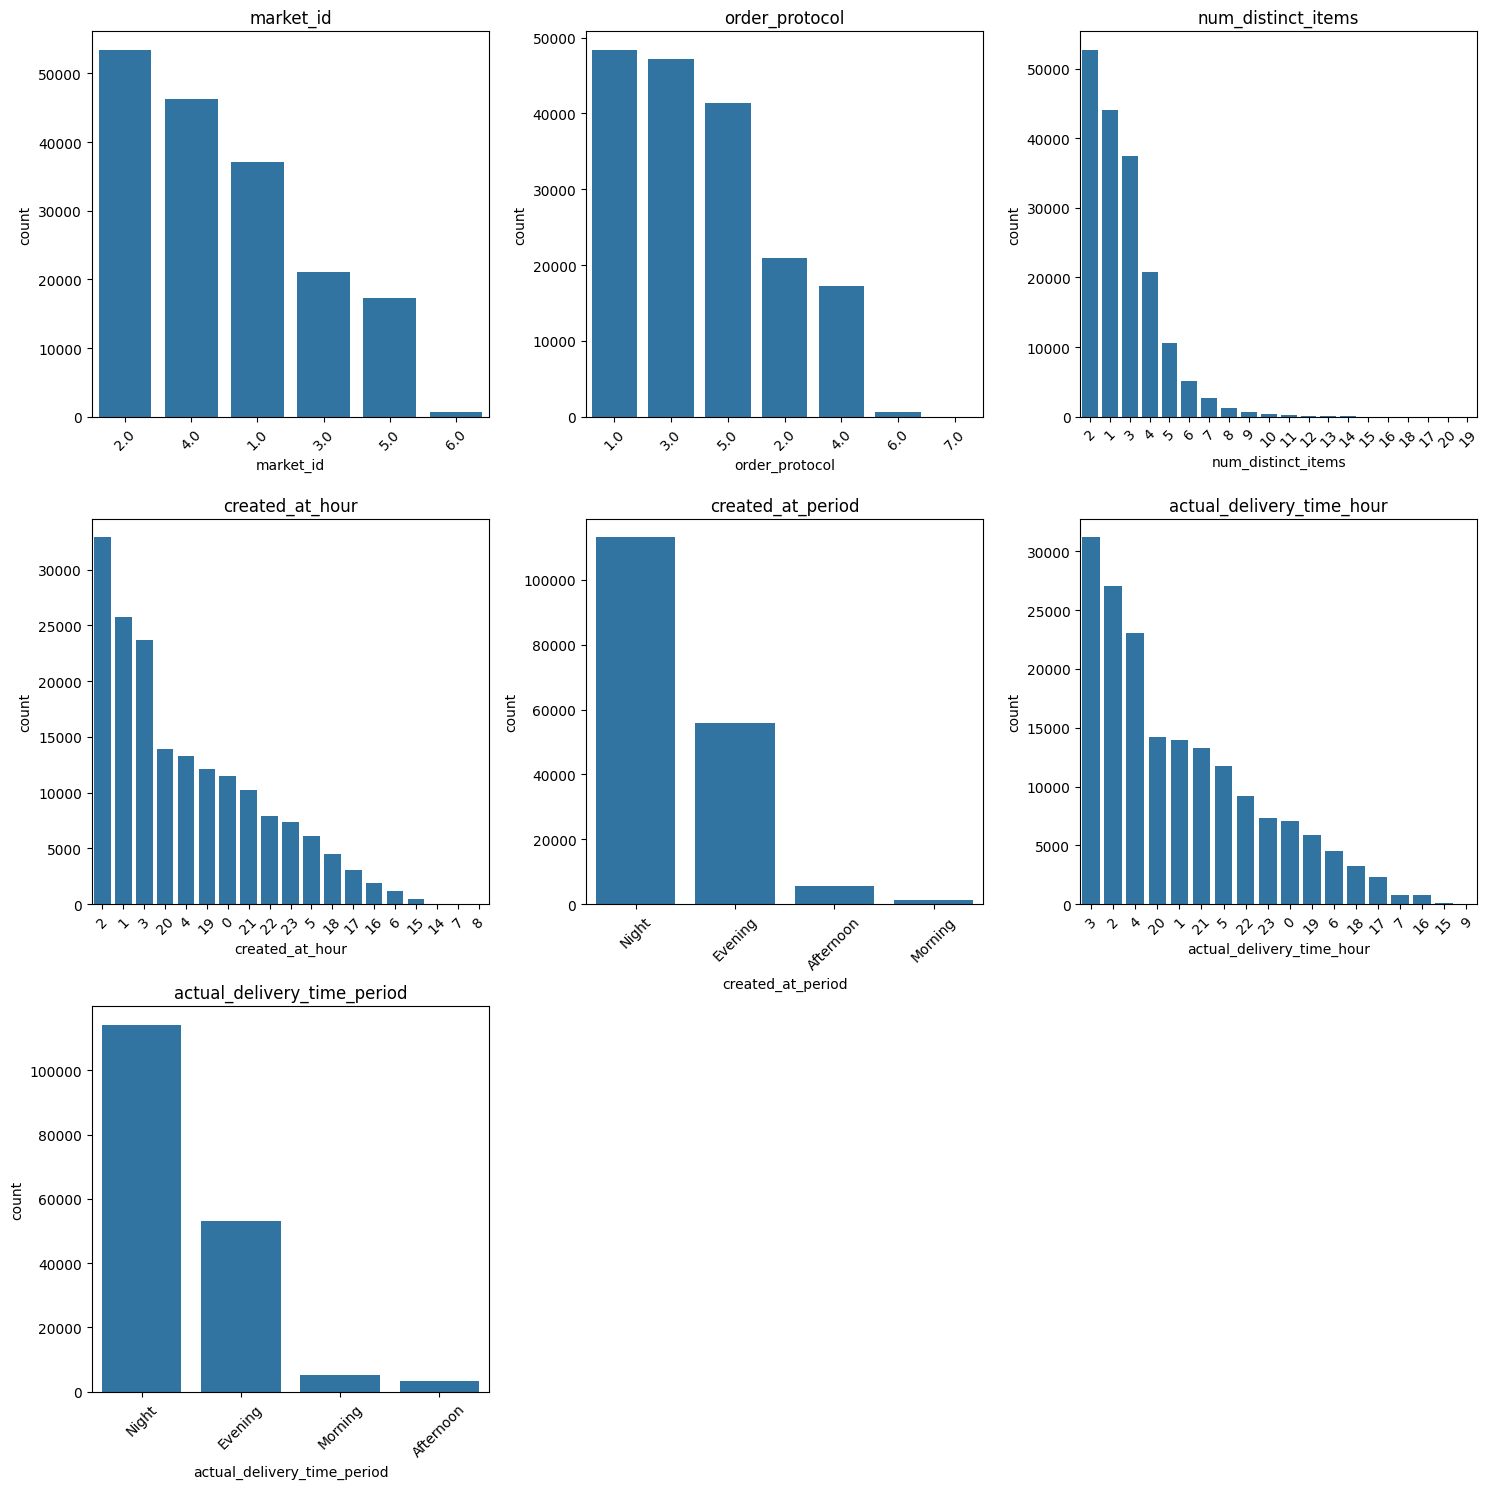

In [22]:
# plot categorical columns from cat_cols (exclude timestamps / very high-cardinality)
exclude = ['created_at', 'actual_delivery_time']
cat_candidates = [c for c in cat_cols.columns if c not in exclude and cat_cols[c].nunique() <= 50]

n = len(cat_candidates)
cols = 3
rows = (n + cols - 1) // cols if n else 1
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_candidates):
    ax = axes[i]
    vc = cat_cols[col].value_counts()
    if vc.size > 20:
        order = vc.nlargest(20).index
        sns.countplot(data=cat_cols, x=col, order=order, ax=ax)
        ax.set_title(f"{col} (top 20)")
    else:
        sns.countplot(data=cat_cols, x=col, order=vc.index, ax=ax)
        ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,created_at_hour,created_at_period,actual_delivery_time_hour,actual_delivery_time_period
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,Evening,23,Evening
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,Evening,22,Evening
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,Night,1,Night
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,Night,4,Night
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,Night,2,Night


<Axes: xlabel='total_outstanding_orders', ylabel='count'>

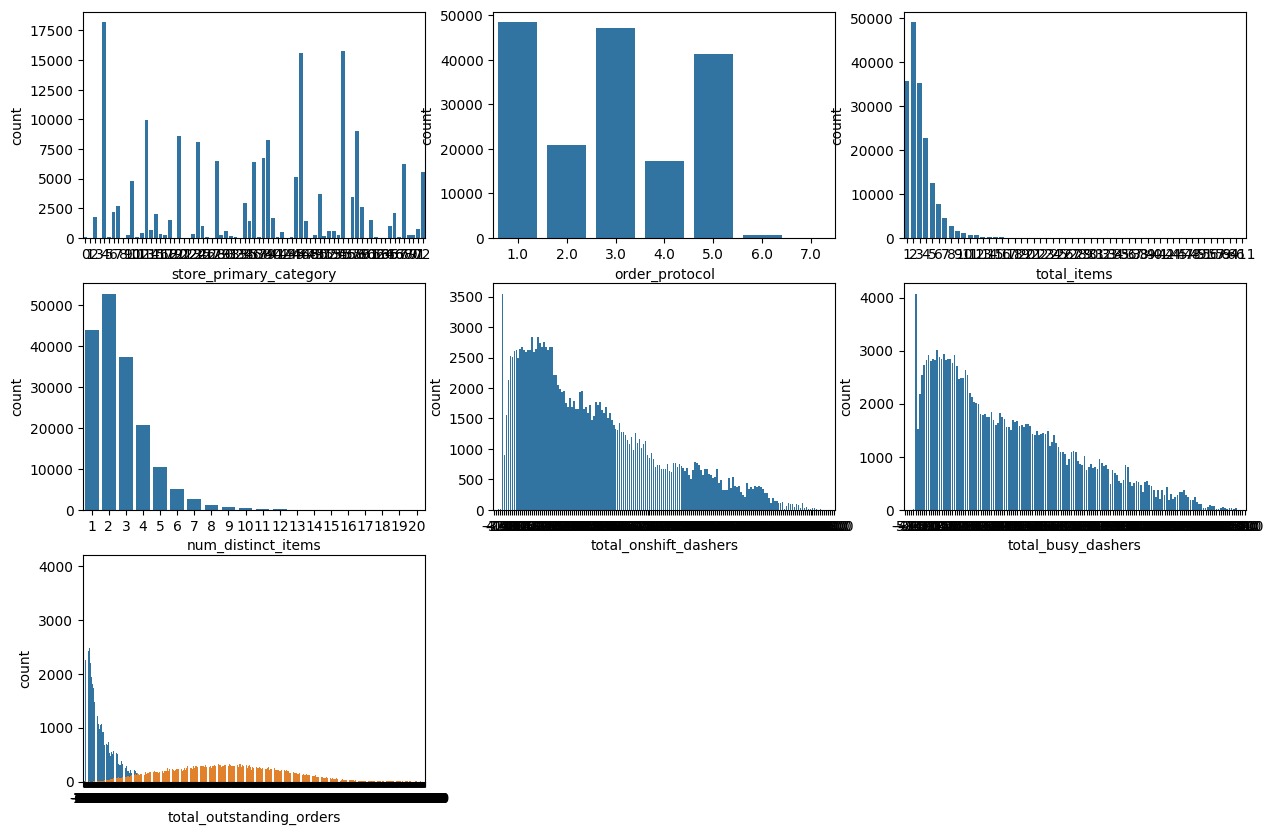

In [24]:

plt.figure(figsize=(15, 10))

#Histogram
plt.subplot(3, 3 ,1)
sbn.countplot(data=cat_cols, x=cat_cols['store_primary_category'])

plt.subplot(3, 3 ,2)
sbn.countplot(data=cat_cols, x=cat_cols['order_protocol'])

plt.subplot(3, 3 ,3)
sbn.countplot(data=cat_cols, x=cat_cols['total_items'])

plt.subplot(3, 3,4)
sbn.countplot(data=cat_cols, x=cat_cols['num_distinct_items'])

plt.subplot(3, 3,5)
sbn.countplot(data=cat_cols, x=cat_cols['total_onshift_dashers'])

plt.subplot(3, 3 ,6)
sbn.countplot(data=cat_cols, x=cat_cols['total_busy_dashers'])

plt.subplot(3,3,7)
sbn.countplot(data=cat_cols, x=cat_cols['total_outstanding_orders'])


plt.subplot(3,3,7)
sbn.countplot(data=cat_cols, x=cat_cols['estimated_store_to_consumer_driving_duration'])

In [25]:
# map period labels to numeric codes
mapping = {'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}
cols = ['created_at_period', 'actual_delivery_time_period']

for col in cols:
    data[f'{col}_num'] = data[col].map(mapping).astype('Int64')

# quick check
for col in cols:
    print(col, data[f'{col}_num'].value_counts(dropna=False))

created_at_period created_at_period_num
0    113101
3     55908
2      5534
1      1234
Name: count, dtype: Int64
actual_delivery_time_period actual_delivery_time_period_num
0    114119
3     53116
1      5336
2      3206
Name: count, dtype: Int64


In [26]:
data = data.drop(columns=['created_at_period', 'actual_delivery_time_period'])

data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,created_at_hour,actual_delivery_time_hour,created_at_period_num,actual_delivery_time_period_num
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,23,3,3
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,22,3,3
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,1,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,4,0,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,2,0,0


<Axes: >

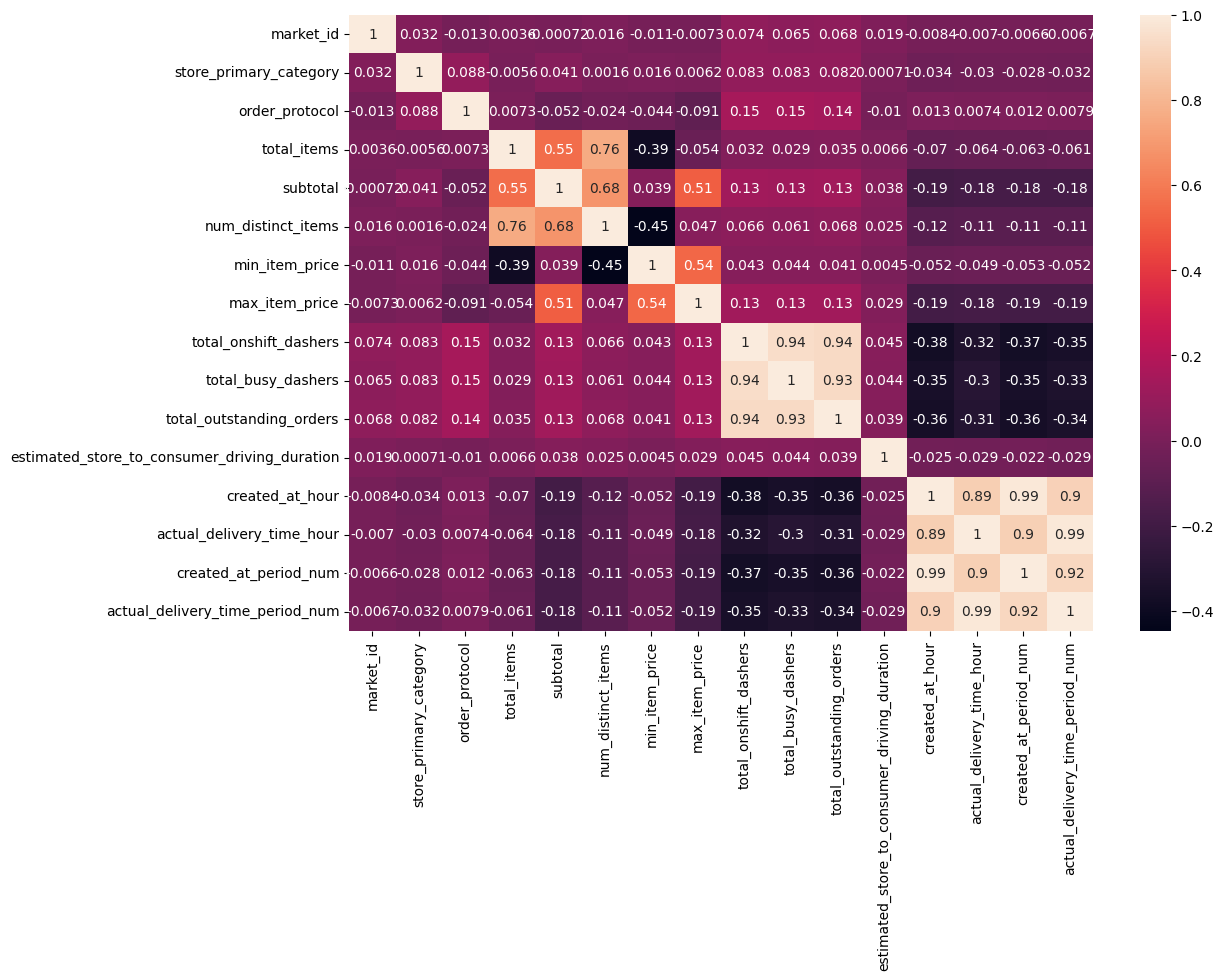

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

<Axes: >

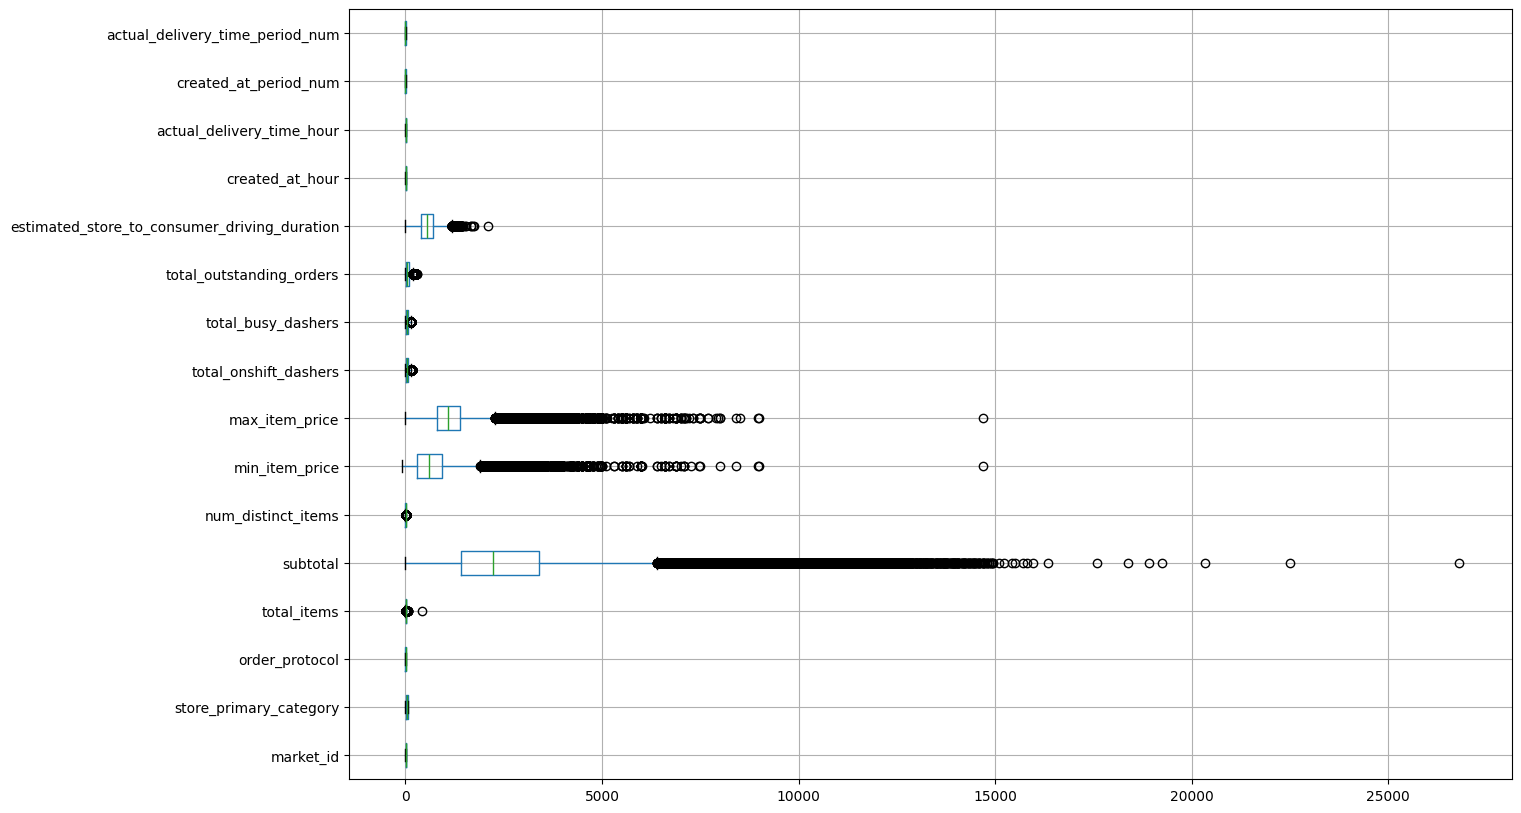

In [28]:
data.boxplot(rot = 0, vert=False)

In [29]:
# # bin continuous target into classes and plot distribution + scatter colored by class
# data['duration_class'] = pd.qcut(data[TARGET], q=3, labels=['short', 'medium', 'long'])

# plt.figure(figsize=(14,5))

# plt.subplot(1,2,1)
# sbn.countplot(x='duration_class', data=data, order=['short','medium','long'])
# plt.title('Duration class distribution')
# plt.xlabel('Duration class')
# plt.ylabel('Count')

# plt.subplot(1,2,2)
# # sample for performance/clarity
# plot_df = data.sample(n=min(5000, len(data)), random_state=RANDOM_STATE)
# sbn.scatterplot(data=plot_df, x='subtotal', y=TARGET, hue='duration_class', palette='Set1', alpha=0.6)
# plt.title('Subtotal vs Duration (colored by class)')
# plt.xlabel('subtotal')
# plt.ylabel(TARGET)
# plt.legend(title='class')

# plt.tight_layout()
# plt.show()

In [30]:
# ...existing code...
# Add a new cell below to build, train and save a regression NN. Replace TARGET with your target column name.

# === CONFIG ===
TARGET = "estimated_store_to_consumer_driving_duration"  # <-- replace with the name of the column you want to predict
RANDOM_STATE = 42

# === Prepare dataframe (use the notebook's `data` variable) ===
df = data.copy()
df = df.dropna(subset=[TARGET])  # ensure target present
y = df[TARGET].astype(float)
X = df.drop(columns=[TARGET])

In [31]:

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3 , random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (86130, 15) (86130,)
Validation: (36913, 15) (36913,)
Test  :  (52734, 15) (52734,)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [33]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
def create_baseline(input_dim):
  model = Sequential([
    layers.Input(shape=(input_dim,)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation='linear')
  ])
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [35]:
model = create_baseline(X_train.shape[1])

In [36]:
X_train.shape

(86130, 15)

In [37]:
# model.compile(optimizer = tf.keras.optimizers.SGD(),
#                 loss = tf.keras.losses.CategoricalCrossentropy() )

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=64,
    verbose=1
)


Epoch 1/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 68905.1484 - mae: 207.0986 - val_loss: 48934.2461 - val_mae: 181.0616
Epoch 2/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 48984.7969 - mae: 180.9786 - val_loss: 48085.8789 - val_mae: 179.5132
Epoch 3/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 48364.8438 - mae: 179.8989 - val_loss: 47694.3008 - val_mae: 178.7773
Epoch 4/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 48046.4727 - mae: 179.3210 - val_loss: 47469.4453 - val_mae: 178.3481
Epoch 5/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 47855.5039 - mae: 178.9626 - val_loss: 47316.5781 - val_mae: 178.0669
Epoch 6/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 47704.1719 - mae: 178.6733 - val_loss: 47186.9727 - val_mae: 177.8153
Epoch 7/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 47561.4844 - mae: 178.3962 - val_loss: 47050.3984 - val_mae: 177.5365
Epoch 8/200
1346/1346 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 47409

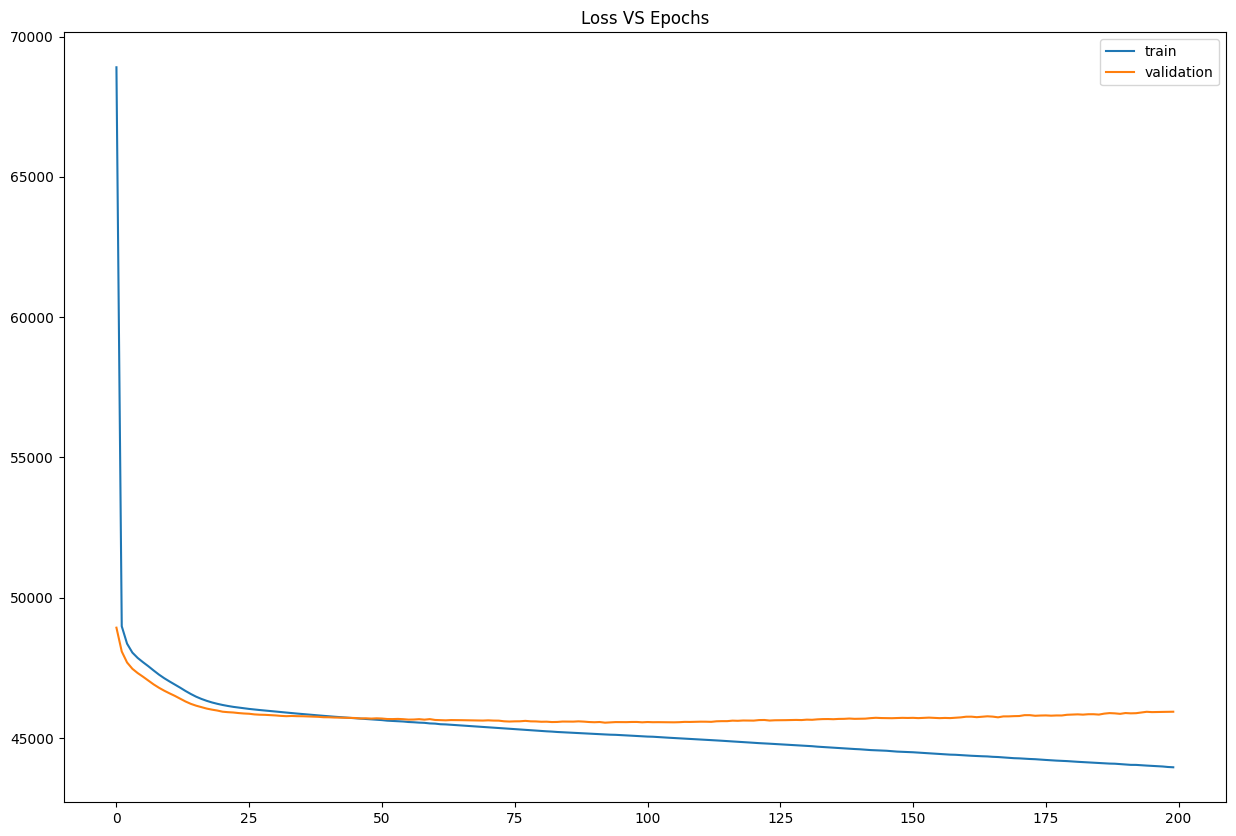

In [39]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

In [40]:
def build_model(learning_rate=0.001, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons//2, activation='relu'))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )

    return model

In [41]:
model = KerasRegressor(model=build_model, verbose=0)

In [42]:
param_grid = {
    "learning_rate": [0.01, 0.001, 0.0005],
    "batch_size": [32, 64, 128],
    "epochs": [50, 100],
    "neurons": [64, 128, 256]
}

In [43]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3
)

grid_result = grid.fit(X_train, y_train)

ValueError: Invalid parameter learning_rate for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(learning_rate=0.01)`
Check the list of available parameters with `estimator.get_params().keys()`

In [64]:
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", -grid_result.best_score_)

NameError: name 'grid_result' is not defined

In [166]:


# One-hot encode categorical features (keeps numeric as-is)
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Build model ===
def build_model(input_dim):
    model = Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

model = build_model(X_train.shape[1])

# === Train ===
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

# === Evaluate & Save ===
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {mse:.4f}  Test MAE: {mae:.4f}")

model.save(r"models\nn_regressor")  # Windows path relative to repo
print("Model saved to models\\nn_regressor")
# ...existing code...

Epoch 1/200


KeyboardInterrupt: 